# Práctica 2

Integrantes:
- Angel Martinez
- Alejandra Sarria
- Juan Segura

In [88]:
# Importar librerías
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.optimize import curve_fit

# Diseño de los gráficos
sns.set()
sns.set_context("paper")
sns.set_palette("colorblind")

### Experimento 1

En el riel, el objeto se encuentra en la posicion ($141.9 \pm 0.5$)cm.

En el riel, la primera distancia de objeto se ubica en la posicion ($108.8 \pm 0.5$)cm.

Entre puntos consecutivos de la diapositiva hay $(4.0 \pm 0.5)$ mm.

In [101]:
# Incertidumbre nominal de las distancias tomadas
ds = 0.05 # 0.5mm = 0.05cm

# Arreglo con las distancias objeto so
so = np.array([33.1, 38.1, 43.1, 48.1, 53.1, 58.1, 63.1, 68.1, 73.1, 78.1])

# Arreglo de arreglos de los 5 valores de distancia imagen si para cada so
si = np.array([[92.8, 92.4, 91.8, 93.6, 91.6],
      [67.0, 70.0, 66.3, 69.7, 69.0],
      [57.0, 58.0, 57.2, 58.5, 58.2],
      [51.0, 51.5, 50.9, 51.7, 51.1],
      [47.1, 47.7, 47.7, 48.6, 47.8],
      [44.7, 44.2, 43.9, 43.5, 44.4],
      [41.6, 42.6, 41.6, 42.3, 42.8],
      [39.9, 40.0, 40.3, 40.5, 41.0],
      [39.9, 40.3, 38.7, 38.7, 39.5],
      [37.4, 37.8, 38.2, 38.7, 38.2]])

# Distancia de la imagen como función de la distancia del objeto, tomando como parámetro la distancia focal
def si_func(so, f):
    return 1 / (1/f - 1/so)

# Ecuacion de la recta
def recta(x, b, a):
    return b + a * x

# Calculo del R2
def R2(funcion, so_datos, si_datos, par):
    si_ajuste = funcion(so_datos, *par)
    RSS = np.sum((si_datos - si_ajuste)**2)
    TSS = np.sum((si_datos - np.mean(si_datos))**2)
    return 1 - RSS / TSS

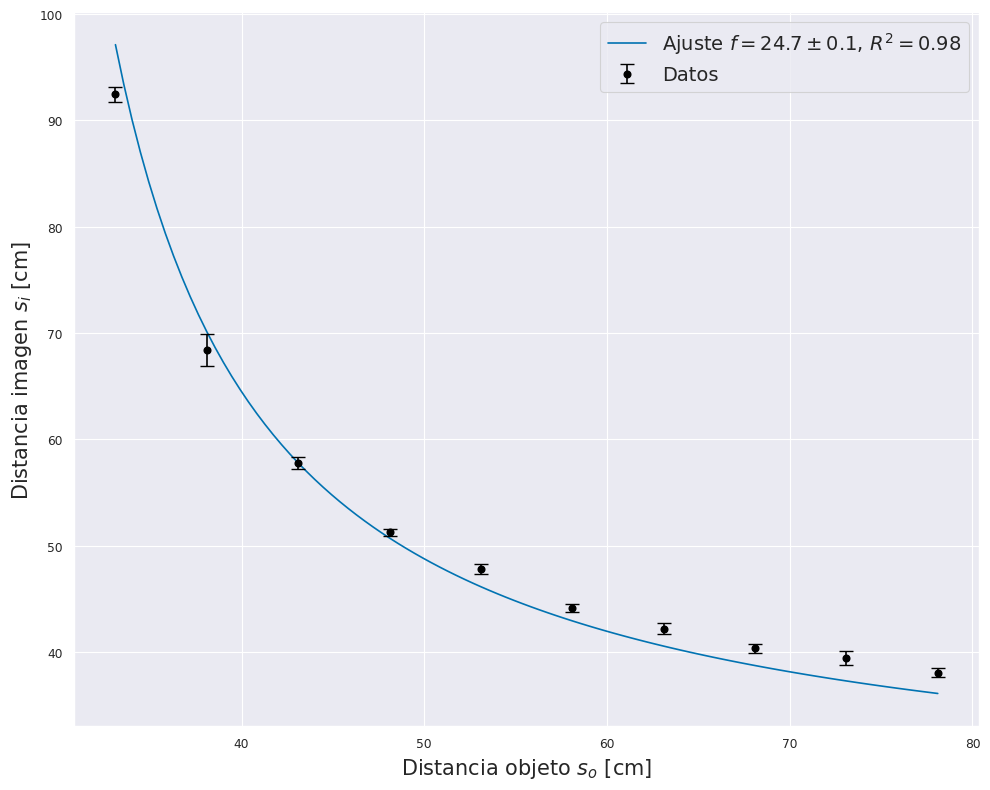

In [103]:
# Para cada si, tomar el promedio de los 5 valores reportados
si_prom = np.array([np.mean(i) for i in si])

# Para cada si, tomar su incertidumbre en consideracion de la desviacion estandar y el error nominal
si_desv = np.array([np.std(i) for i in si])
si_err = np.sqrt(si_desv**2 + ds**2)

# Realizar el ajuste de datos para el primer experimento (Ecuacion de Gauss)
f, df = curve_fit(si_func, so, si_prom, sigma= si_err)
f = f[0]; df = np.sqrt(df[0][0])

# Calculo del R2
r2 = R2(si_func, so, si_prom, (f,))

# Graficación de la curva
fig, ax = plt.subplots(figsize= (10, 8))
so_lins = np.linspace(so[0], so[-1], 100)
ax.plot(so_lins, si_func(so_lins, f), label=rf"Ajuste $f = {f:.1f} \pm {df:.1f}$, $R^2 = {r2:.2f}$")
ax.errorbar(so, si_prom, yerr = si_err, fmt='o', color='black', ecolor='black', capsize=5, label='Datos')
ax.set_xlabel(r"Distancia objeto $s_o$ [cm]", fontsize= 15)
ax.set_ylabel(r"Distancia imagen $s_i$ [cm]", fontsize= 15)
ax.grid(True)
ax.legend(fontsize= 14)
plt.tight_layout()
plt.savefig("Prac2_Ajuste_exp1_curva.pdf")
plt.show()

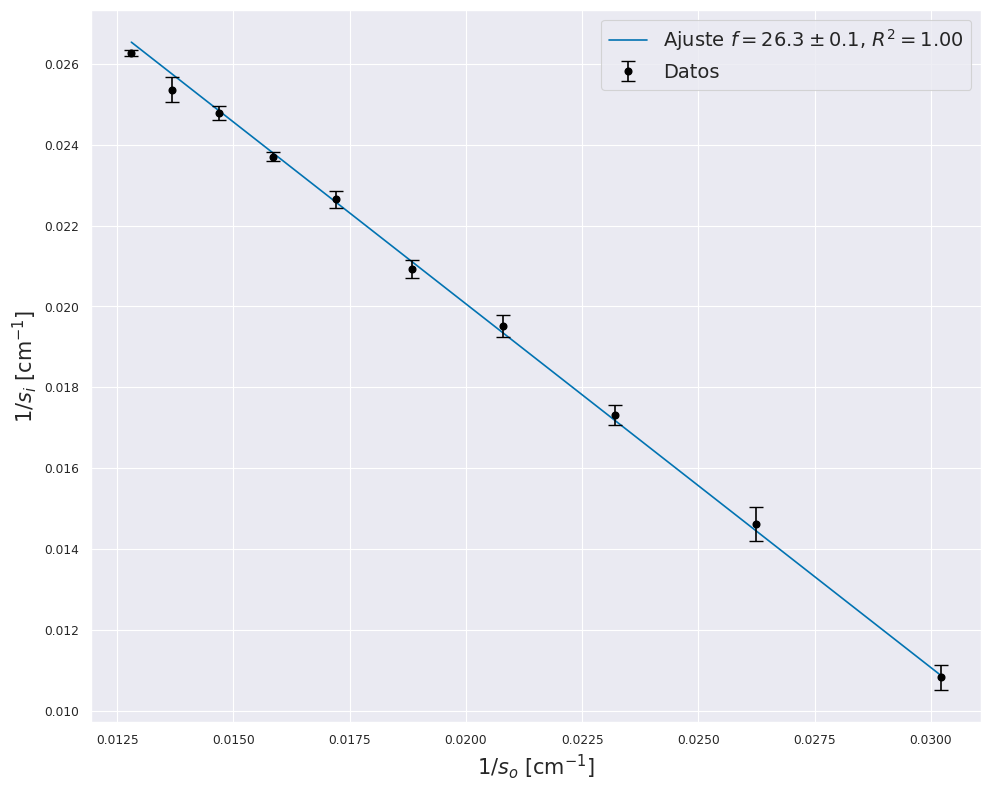

In [104]:
# Experimento 1 de Gauss mediante un ajuste de recta

# Hallar los inversos de las distancias y organizarlos junto a sus incertidumbres
so_inv = (1 / so)[::-1]
si_inv = (1 / si_prom)[::-1]
dso_inv = (ds / so**2)[::-1]
dsi_inv = (si_err / si_prom**2)[::-1]

# Realizar el ajuste de datos para el primer experimento mediante recta (Ecuacion de Gauss)
par, cov = curve_fit(recta, so_inv, si_inv, sigma= dsi_inv)
f_inv = par[0]; df_inv = np.sqrt(cov[0][0])
f = 1 / f_inv; df = df_inv / f_inv**2

# Calculo del R2
r2 = R2(recta, so_inv, si_inv, (par[0], par[1]))

# Graficacion de la recta
so_lins_inv = (1 / so_lins)[::-1]
fig, ax = plt.subplots(figsize= (10, 8))
ax.plot(so_lins_inv, recta(so_lins_inv, 1 / f, par[1]), label=rf"Ajuste $f = {f:.1f} \pm {df:.1f}$, $R^2 = {r2:.2f}$")
ax.errorbar(so_inv, si_inv, yerr = si_err / si_prom**2, fmt='o', color='black', ecolor='black', capsize=5, label='Datos')
ax.set_xlabel(r"$1 / s_o$ [cm$^{-1}$]", fontsize= 15)
ax.set_ylabel(r"$1 / s_i$ [cm$^{-1}$]", fontsize= 15)
ax.grid(True)
ax.legend(fontsize= 14)
plt.tight_layout()
plt.savefig("Prac2_Ajuste_exp1_recta.pdf")
plt.show()

### Experimento 2

Se tiene que la siguiente es la ecuación de Newton para lentes positivas:

\begin{equation}
    x_o x_i = f
\end{equation}

El aumento de la imagen viene dado por $m = h_i / h_o$, por lo tanto, se puede escribir la ecuación de Newton de la siguiente forma:

\begin{equation}
    m = \frac{f}{x_o} = \frac{f}{s_o - f} = \frac{1}{\frac{s_o}{f} - 1}
\end{equation}


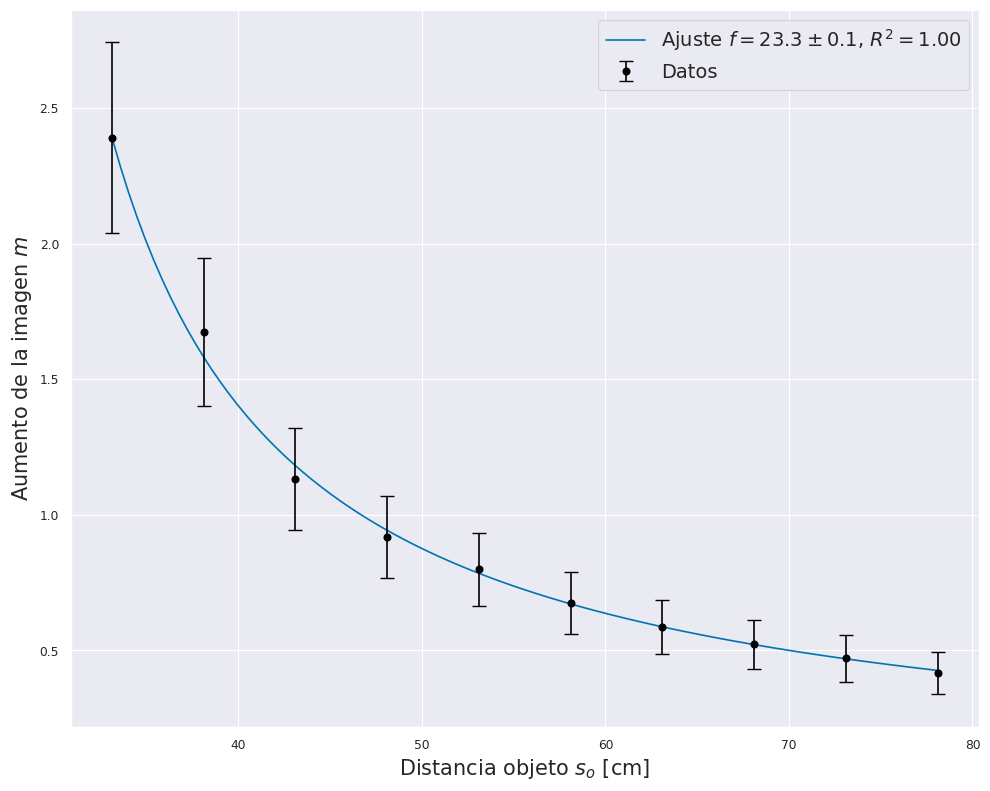

In [105]:
# Distancia entre puntos sucesivos de la diapositiva (objeto) y su error nominal
po = 4     # 4 mm
dpo = 0.5  # 0.5 mm

# Distancias entre puntos de la imagen (en mm)
pi = np.array([[9.83, 9.32, 9.46, 9.51, 9.71],
              [6.91, 6.38, 6.45, 6.76, 6.96],
              [4.70, 4.64, 4.55, 4.52, 4.25],
              [3.54, 3.79, 3.72, 3.76, 3.56],
              [3.28, 3.14, 3.06, 3.34, 3.17],
              [2.74, 2.76, 2.75, 2.62, 2.61],
              [2.34, 2.38, 2.35, 2.36, 2.32],
              [2.11, 2.09, 2.09, 2.11, 2.04],
              [1.81, 1.91, 1.93, 1.91, 1.87],
              [1.73, 1.66, 1.68, 1.65, 1.62]])

# Incertidumbre nominal del tracker
dpi_nominal = 0.01

# Hallar promedios, desviaciones estandar y error total
pi_prom = np.array([np.mean(i) for i in pi])
pi_desv = np.array([np.std(i) for i in pi])
pi_err = np.sqrt(pi_desv**2 + dpi_nominal)

# Calculo del aumento de la imagen m y su incertidumbre
m = pi_prom / po
dm = pi_err / po + pi_prom * dpo / po**2

# Aumento de la imagen en funcion de la distancia del objeto y la distancia focal como parametro
def m_func(so, f):
    return 1 / (so / f - 1)

# Realizar el ajuste de datos para el segundo experimento (Ecuacion de Newton)
f, df = curve_fit(m_func, so, m, sigma= dm)
f = f[0]; df = np.sqrt(df[0][0])

# Calculo del R2
r2 = R2(m_func, so, m, (f,))

# Graficación
fig, ax = plt.subplots(figsize= (10, 8))
so_lins = np.linspace(so[0], so[-1], 100)
ax.plot(so_lins, m_func(so_lins, f), label=rf"Ajuste $f = {f:.1f} \pm {df:.1f}$, $R^2 = {r2:.2f}$")
ax.errorbar(so, m, yerr = dm, fmt='o', color='black', ecolor='black', capsize=5, label='Datos')
ax.set_xlabel(r"Distancia objeto $s_o$ [cm]", fontsize= 15)
ax.set_ylabel(r"Aumento de la imagen $m$", fontsize= 15)
ax.grid(True)
ax.legend(fontsize= 14)
plt.tight_layout()
plt.savefig("Prac2_Ajuste_exp2_curva.pdf")
plt.show()

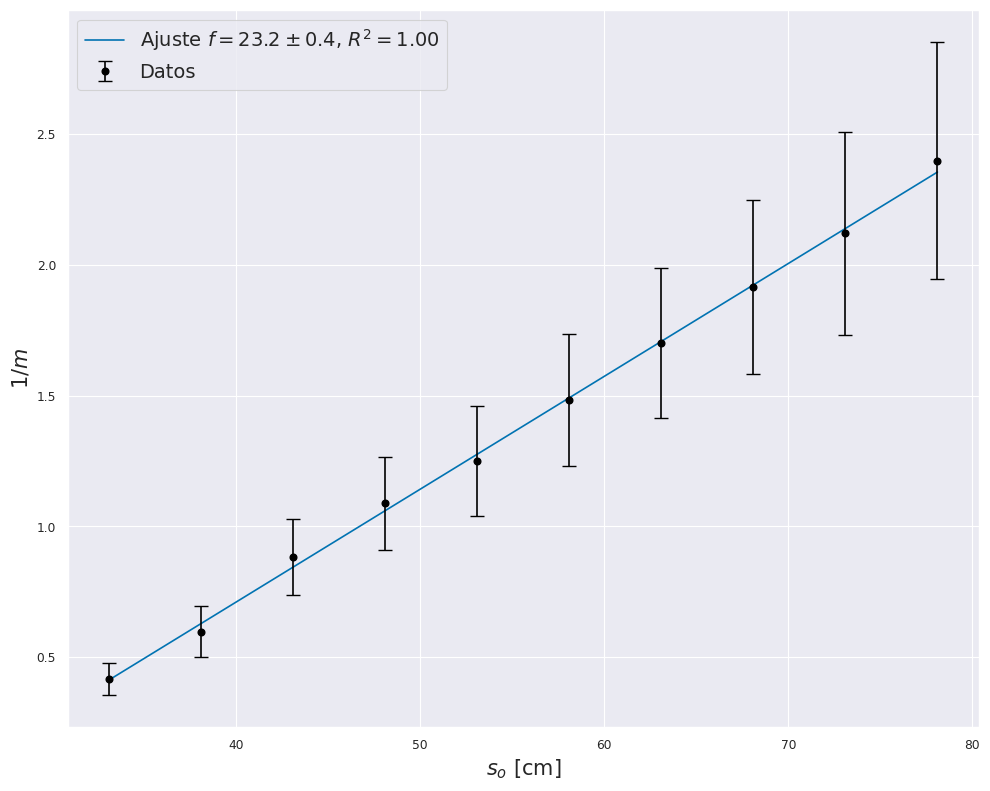

In [107]:
# Experimento 2 de Newton mediante un ajuste de recta

# Hallar los inversos de las distancias y organizarlos junto a sus incertidumbres
m_inv = 1 / m
dm_inv = dm / m**2

# Realizar el ajuste de datos para el primer experimento mediante recta (Ecuacion de Gauss)
par, cov = curve_fit(recta, so, m_inv, sigma= dm_inv)
f_inv = par[1]; df_inv = np.sqrt(cov[1][1])
f = 1 / f_inv; df = df_inv / f_inv**2

# Calculo del R2
r2 = R2(recta, so, m_inv, (par[0], par[1]))

# Graficacion de la recta
fig, ax = plt.subplots(figsize= (10, 8))
ax.plot(so_lins, recta(so_lins, par[0], par[1]), label=rf"Ajuste $f = {f:.1f} \pm {df:.1f}$, $R^2 = {r2:.2f}$")
ax.errorbar(so, m_inv, yerr = dm_inv, fmt='o', color='black', ecolor='black', capsize=5, label='Datos')
ax.set_xlabel(r"$s_o$ [cm]", fontsize= 15)
ax.set_ylabel(r"$1 / m$", fontsize= 15)
ax.grid(True)
ax.legend(fontsize= 14)
plt.tight_layout()
plt.savefig("Prac2_Ajuste_exp2_recta.pdf")
plt.show()

### Experimento 3



La posicion del objeto es 140.6cm
La posicion de la pantalla es 23.4cm.

Para la minima.

La posicion de la lente es: 
58.6
61.1
60.2
60
60.7

Entre 5 puntos se registro un ancho de 1cm.

Para la maxima.
La posicion de la lente es:
105.9
106.3
106.2
105.3
106.2


### Experimento 4

La distancia entre la lente y el objeto es de 198cm.
La distancia entre la lente y la imagen es de 30.1cm.